In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [4]:
model = keras.applications.VGG16(weights='imagenet', include_top=False)

2023-11-02 21:53:08.547630: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-02 21:53:08.565376: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-02 21:53:08.565542: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-02 21:53:08.566004: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [5]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

def extract_vgg16_features(image_path, model):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = preprocess_input(img)
    img = np.expand_dims(img, axis=0)

    # Extract features from the desired layer (e.g., block5_pool)
    layer_name = 'block5_pool'  # You can choose a different layer
    intermediate_layer_model = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
    features = intermediate_layer_model.predict(img)

    return features

In [8]:
import os

img_dir = "/home/zach/PycharmProjects/term7cv/dataset/objects/train_4"

features_dict = {}

for img_name in os.listdir(img_dir):
    feature = extract_vgg16_features(img_dir + "/" + img_name, model)
    features_dict[img_name] = feature


1/1 [==============================] - 0s 63ms/step


In [17]:
filenames = []
feature_vectors = []

for img, feature in features_dict.items():
    filenames.append(img)
    flattened_feature = np.reshape(feature, (7*7*512))
    feature_vectors.append(flattened_feature)

In [18]:
from sklearn.preprocessing import StandardScaler

# Normalize the feature vectors
scaler = StandardScaler()
normalized_features = scaler.fit_transform(feature_vectors)

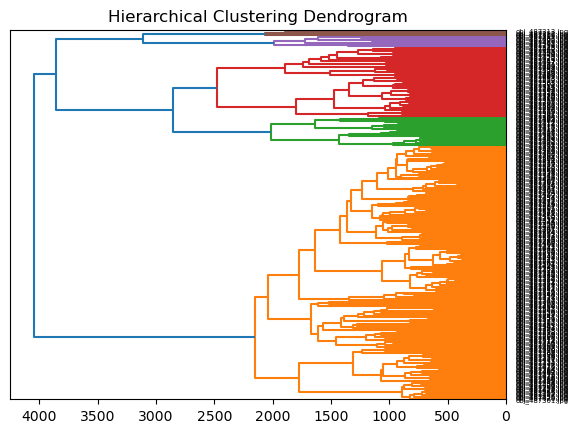

In [19]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Compute the linkage matrix
linkage_matrix = linkage(feature_vectors, method='ward')

# Create a dendrogram to visualize the hierarchical structure
dendrogram(linkage_matrix, labels=filenames, orientation="left")

# You can use different parameters for dendrogram visualization to customize it.
plt.title("Hierarchical Clustering Dendrogram")
plt.show()